In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris, load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [3]:
df = pd.read_csv('income.csv')
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0
48838,64,321403,9,0,0,40,0
48839,38,374983,13,0,0,50,0
48840,44,83891,13,5455,0,40,0


In [4]:
X = df.drop("income_level", axis=1)
y = df["income_level"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model_10 = AdaBoostClassifier(n_estimators=10, random_state=42)
model_10.fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)
score_10 = accuracy_score(y_test, y_pred_10)
print(f"Accuracy with 10 estimators: {score_10:.4f}")

Accuracy with 10 estimators: 0.8182


In [7]:
estimator_range = range(10, 101, 10)
scores = []

for n in estimator_range:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"n_estimators={n}, Accuracy={acc:.4f}")

n_estimators=10, Accuracy=0.8182
n_estimators=20, Accuracy=0.8244
n_estimators=30, Accuracy=0.8310
n_estimators=40, Accuracy=0.8314
n_estimators=50, Accuracy=0.8327
n_estimators=60, Accuracy=0.8328
n_estimators=70, Accuracy=0.8334
n_estimators=80, Accuracy=0.8335
n_estimators=90, Accuracy=0.8329
n_estimators=100, Accuracy=0.8328


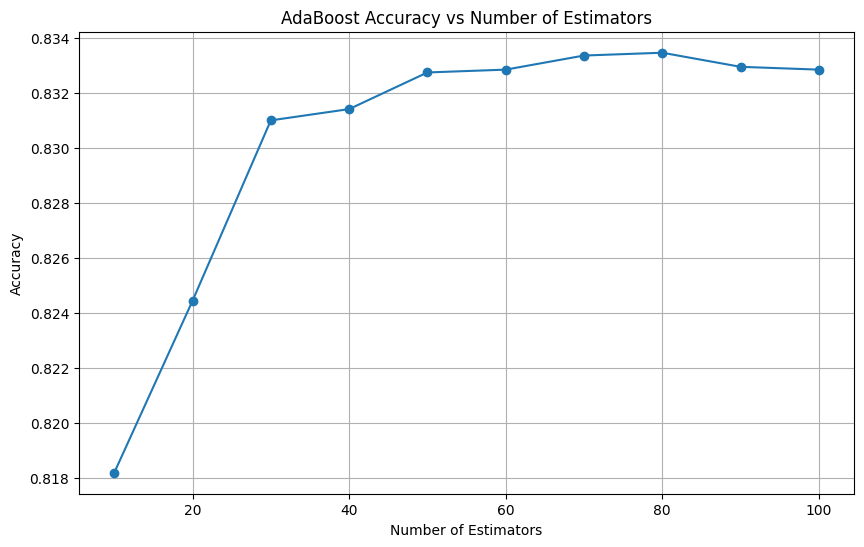

In [8]:
plt.figure(figsize=(10,6))
plt.plot(estimator_range, scores, marker='o')
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [9]:
best_n = estimator_range[scores.index(max(scores))]
best_score = max(scores)
print(f"\nBest Accuracy: {best_score:.4f} with n_estimators={best_n}")


Best Accuracy: 0.8335 with n_estimators=80


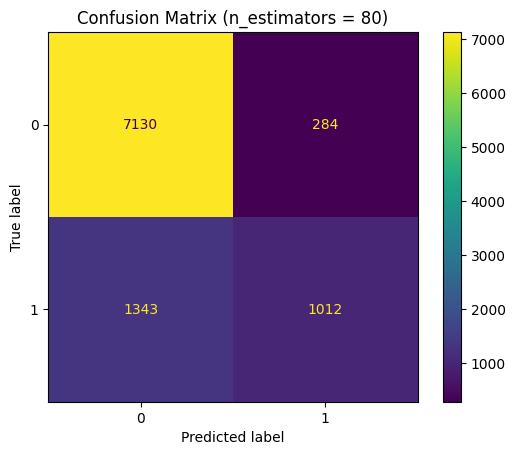

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_model = AdaBoostClassifier(n_estimators=80, random_state=42)
best_model.fit(X_train, y_train)
y_best_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (n_estimators = 80)")
plt.show()